In [1]:
import pandas as pd
df = pd.read_csv("Data/ram_price.csv")
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price ($/Mbyte)')

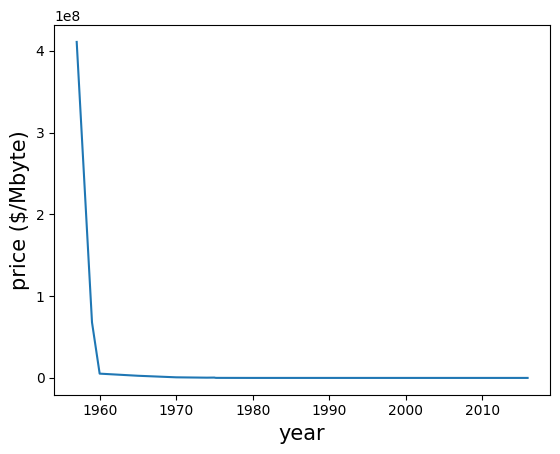

In [40]:
import matplotlib.pyplot as plt

plt.plot(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

Text(0, 0.5, 'price ($/Mbyte)')

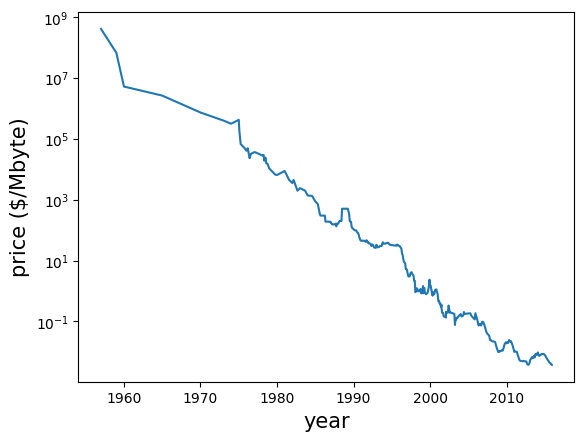

In [2]:
# y축 로그 스케일링
plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

# x축 날짜, y축 램 가격
# 시간이 지날수록 램 가격은 점차 하락하고 있음

In [33]:
import numpy as np

#학습용과 검증용 구분(2000년 이전과 이후로 구분)
X_train0 = df[df['date'] < 2000]
X_test0 = df[df['date'] >= 2000]


In [28]:
np.array(X_train0.date,)
# X_train0['date'].values

array([1957.  , 1959.  , 1960.  , 1965.  , 1970.  , 1973.  , 1974.  ,
       1975.  , 1975.08, 1975.25, 1975.75, 1976.  , 1976.17, 1976.42,
       1976.58, 1977.08, 1978.17, 1978.25, 1978.33, 1978.5 , 1978.58,
       1978.75, 1979.  , 1979.75, 1980.  , 1981.  , 1981.58, 1982.  ,
       1982.17, 1982.67, 1983.  , 1983.67, 1984.  , 1984.58, 1985.  ,
       1985.33, 1985.42, 1985.5 , 1985.58, 1985.67, 1985.83, 1985.92,
       1986.  , 1986.08, 1986.17, 1986.25, 1986.33, 1986.42, 1986.5 ,
       1986.58, 1986.67, 1986.75, 1986.92, 1987.  , 1987.08, 1987.17,
       1987.25, 1987.33, 1987.42, 1987.5 , 1987.58, 1987.67, 1987.75,
       1987.83, 1987.92, 1988.  , 1988.08, 1988.17, 1988.33, 1988.42,
       1988.5 , 1988.58, 1988.67, 1988.75, 1988.83, 1988.92, 1989.  ,
       1989.08, 1989.17, 1989.25, 1989.42, 1989.5 , 1989.58, 1989.67,
       1989.75, 1989.83, 1989.92, 1990.  , 1990.17, 1990.33, 1990.42,
       1990.5 , 1990.58, 1990.67, 1990.75, 1990.83, 1990.92, 1991.  ,
       1991.08, 1991

In [22]:
#기계학습모형에는 2차원 형태의 데이터가 입력되어야 함
# X_train = X_train0['date'].values # date 필드만을 선택하여 2차원으로 변환
X_train = np.array((X_train0.date,))

# y값을 로그 스케일로 변환
y_train = np.log(X_train0['price'])

In [34]:
X_test = X_test0['date'].values

# y값을 로그 스케일로 변환
y_test = np.log(X_test0['price'])

In [41]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

tree = DecisionTreeRegressor().fit(X_train.reshape(-1,1), y_train)
lr = LinearRegression().fit(X_train.reshape(-1,1), y_train) #선형회귀모형
#svr = SVR(kernel='linear').fit(X_train, y_train)  
svr = SVR(kernel='linear').fit(X_train.reshape(-1,1), y_train)

In [42]:
#전체 기간의 자료
x_all = np.array(df['date']).reshape(-1, 1)
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log값 되돌리기
pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기

pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr) # log값 되돌리기

In [43]:
from sklearn.metrics import mean_squared_error
y_pred = tree.predict(X_test0['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = lr.predict(X_test0['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = svr.predict(X_test0['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

23.038370257895192
861.08402279523
1035.5601664404876


Text(0, 0.5, 'price ($/Mbyte)')

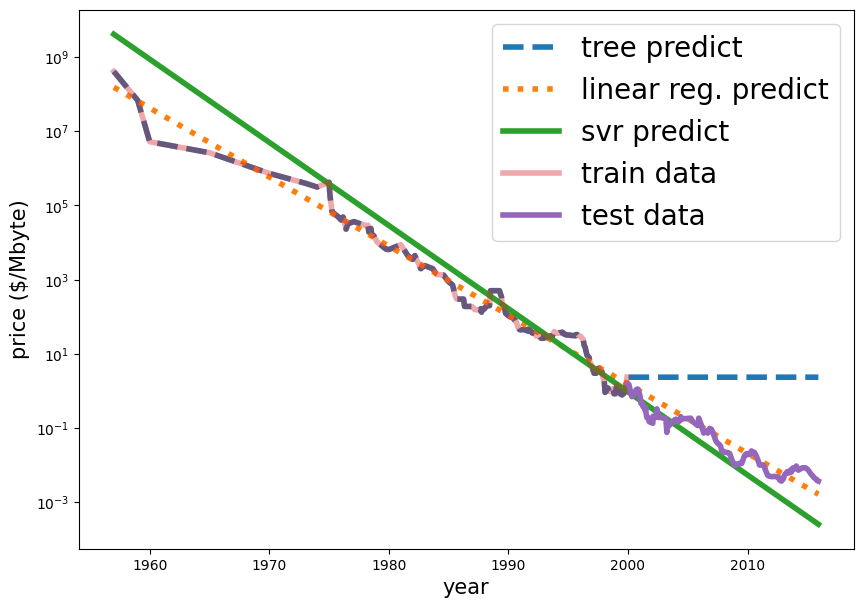

In [44]:
#실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교
plt.figure(figsize=(10,7))
plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls=':')
plt.semilogy(df['date'], price_svr,label='svr predict',lw='4',ls='-')
plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test0['date'], X_test0['price'], lw='4', label='test data')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
# 선형회귀모형: 직선모양
# 결정트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력이 없음(트리 모형의 단점)
# 새로운 데이터를 예측하려면 시계열분석, 순환신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함